Python-in-the-lab: functions and data fitting I
==============================

In [1]:
import os
import numpy as np
import scipy
import matplotlib.pylab as plt
%matplotlib inline

Today we want to work with another type of file, that we can call "the shapes" for short.

These are amplitude vs time, for different values of the duration of the signal. As a matter of fact, the signals have been rescaled so to have the _same duration_ between 0 and 1. This time is the first column. The other columns are the amplitudes for different durations (as written in the first line) 

In [2]:
mainDir = "/home/gf/src/Python/Python-in-the-lab/Bk"
# Today we use another file
filename = "F64ac_0.02_time_V_T.dat"
filename = os.path.join(mainDir, filename)
data = np.loadtxt(filename, comments="#")

In [3]:
# The data loaded are 9 cols of 501 points: the first col is the time, 
# common to all, the others are 8 different amplitudes
data.shape

(501, 9)

In [4]:
time = data[:,0]
type(time)

numpy.ndarray

In [5]:
data[:5]

array([[0.        , 0.04340427, 0.03031505, 0.02843981, 0.02410855,
        0.0181934 , 0.01021206, 0.01017855, 0.00693918],
       [0.002     , 0.06169817, 0.0521141 , 0.05257901, 0.04995166,
        0.04529933, 0.04055326, 0.04091501, 0.03792067],
       [0.004     , 0.07999208, 0.07391315, 0.0767182 , 0.07579477,
        0.07240526, 0.07089447, 0.07165146, 0.06890216],
       [0.006     , 0.09828599, 0.09571219, 0.1008574 , 0.10163788,
        0.0995112 , 0.10123567, 0.10238792, 0.09988365],
       [0.008     , 0.11657989, 0.11751124, 0.12499659, 0.127481  ,
        0.12661713, 0.13157687, 0.13312437, 0.13086514]])

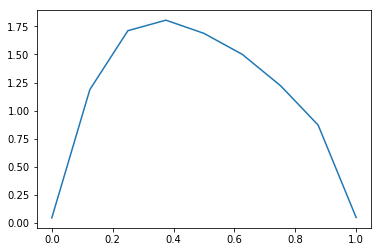

In [6]:
# Let's plot one of them
plt.plot(time, data[:,1],'-');

In [7]:
# The first line of the file containts the labels for the columns: how to read it?
with open(filename) as f:
    header = f.readline() # See the change. 
    # It just reads a single line (the first in this case)

In [8]:
header

'#T \t1.59E-004\t2.21E-004\t3.06E-004\t4.26E-004\t5.92E-004\t8.22E-004\t1.14E-003\t1.59E-003\n'

In [9]:
header.split() # No need to add \t nor \r\n. You already know it.

['#T',
 '1.59E-004',
 '2.21E-004',
 '3.06E-004',
 '4.26E-004',
 '5.92E-004',
 '8.22E-004',
 '1.14E-003',
 '1.59E-003']

In [10]:
# Let's collect the float from the strings except the first
durations = [float(duration) for duration in header.split()[1:]]
durations

[0.000159, 0.000221, 0.000306, 0.000426, 0.000592, 0.000822, 0.00114, 0.00159]

Now let's put the data into a dictionary where the durations are the keys

In [11]:
# Let's now put the 8 amplitudes in a dictionary 
shapes = {}
# A dictionary can be initialized also as : shapes = dict()

Dictionary are objects where each element has a "key".

In [12]:
# Let's now put the 8 columns in the dict. 
# Note the use of enumerate, and the loop on the cols
for i, duration in enumerate(durations):
    shapes[duration] = data[:,i+1]

In [13]:
shapes.keys()

dict_keys([0.000159, 0.000221, 0.000306, 0.000426, 0.000592, 0.000822, 0.00114, 0.00159])

In [14]:
# Let's have a look to the keys
print(shapes.keys())
# They are not sorted!
print(sorted(shapes.keys()))

dict_keys([0.000159, 0.000221, 0.000306, 0.000426, 0.000592, 0.000822, 0.00114, 0.00159])
[0.000159, 0.000221, 0.000306, 0.000426, 0.000592, 0.000822, 0.00114, 0.00159]


In [15]:
# Note that this surprisingly works! (from Python version 2.6, I guess)
sorted(shapes.keys()) == sorted(shapes)

True

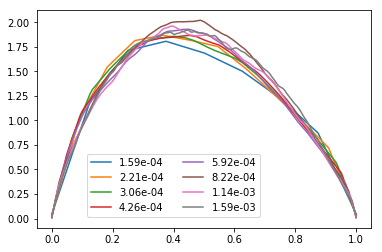

In [16]:
# Let's plot the 8 curves using the dictionary
for duration in sorted(shapes):
    lb = "{0:.2e}".format(duration)
    plt.plot(time, shapes[duration], label=lb)
plt.legend(ncol=2,loc=(0.15,.05));

# Problem
## Scale all curves so they have the same integral = 1

Let's explore scipy. It is a huge [Open Source Library for Scientific Computing](https://www.scipy.org/)

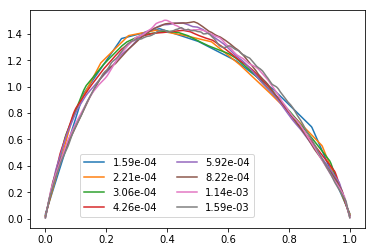

In [17]:
from scipy.integrate import trapz
for duration in sorted(shapes):
    lb = "{0:.2e}".format(duration)
    shape = shapes[duration]
    shape = shape/trapz(shape,time)
    plt.plot(time, shape, label=lb)
plt.legend(ncol=2,loc=(0.15,.05));

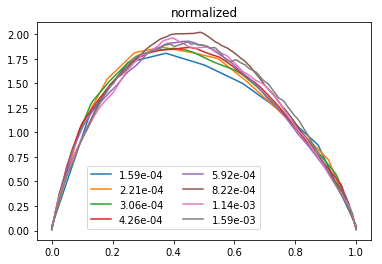

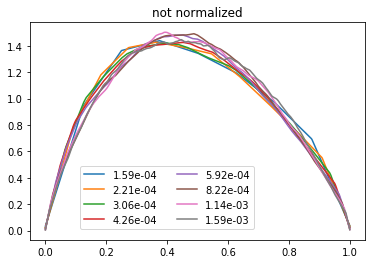

In [18]:
# How to quickly plot two figures
titles = ["normalized", "not normalized"]
for i in range(2):
    plt.figure()
    for duration in sorted(shapes):
        lb = "{0:.2e}".format(duration)
        shape = shapes[duration]
        if i: # Note the trick
            norm = trapz(shape, time)
        else:
            norm = 1
        plt.plot(time, shape/norm, label=lb)
    plt.legend(ncol=2,loc=(0.15,.05))
    plt.title(titles[i])


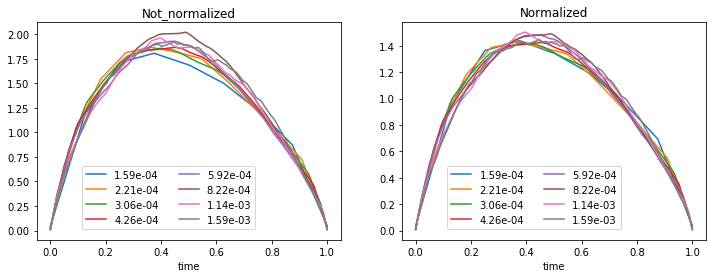

In [20]:
# or plot them together, as seen before
fig, axs = plt.subplots(1,2,figsize=(12,4))
for i in range(2):
    for duration in sorted(shapes):
        lb = "{0:.2e}".format(duration)
        shape = shapes[duration]
        if i: # Note the trick
            norm = trapz(shape, time)
        else:
            norm = 1
        axs[i].plot(time, shape/norm, label=lb)
    axs[i].set_xlabel("time")
    axs[i].legend(ncol=2,loc=(0.15,.05))
axs[0].set_title("Not_normalized")
axs[1].set_title("Normalized");

## Can we plot the two plots in the same figure?

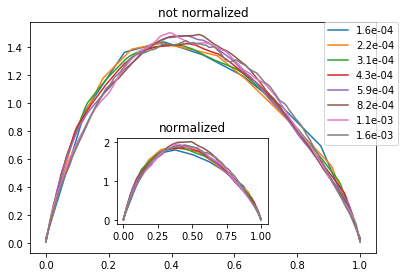

In [23]:
# How to quickly plot two figures
# Let's change the logic of the plot. Any difference?
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
ax2 = fig.add_axes([0.3, 0.2, 0.35, 0.3])
for duration in sorted(shapes):
    lb = "{0:.1e}".format(duration)
    shape = shapes[duration]
    norm = trapz(shapes[duration], time)
    ax1.plot(time, shape/norm, label=lb)
    ax2.plot(time, shape, label=lb)
ax1.set_title("not normalized")
ax1.legend(ncol=1,loc=(.85,.47))
ax2.set_title("normalized");
#fig.savefig("shapes.png", dpi=200)

# Next Problems

- Make the average of the 8 normalized curves (You can do it)
- Make a fit of the average curve with $[x(1-x)]^\gamma * exp(-Ax)$, with $A, \gamma$ as fitting parameters. (You can do it. Look for curve_fit)

Try to solve the problem above by yourself. Anyway, a possible solution is found below

In [ ]:
# Get the average of the 8 curves
average = 0
for duration in shapes:
    shape = shapes[duration]
    average += shape/trapz(shape,time)
average /= len(shapes)
average[:10]

The choice of using a dictionary is for didactical pourpose.

An alternative solution, probably better, is to work directly on the original data

In [ ]:
rows, cols = data.shape
averaged_data = np.copy(data[:,1:])
for i in range(0,cols-1):
    shape = averaged_data[:,i]
    averaged_data[:,i] = shape/trapz(shape,time)
average = averaged_data.mean(axis=1)
average[:10]

In [ ]:
# Replot for comparison with the average
for duration in sorted(shapes):
    lb = "{0:.2e}".format(duration)
    shape = shapes[duration]/trapz(shapes[duration], time)
    plt.plot(time, shape, label=lb)
plt.legend(ncol=2,loc=(0.15,.05))
plt.plot(time, average, 'k', lw=3)
plt.axis((0,1,0,1.5));

## Introduction to data fit 

In [ ]:
# Introduction to functions and fitting function
# Let's first define the name of the parameters
parameters = ["gamma", "A1", "A2"]
def fitShape(x, gamma, a1, a2):
    """
    fitting function for the average shape
    
    Parameters:
    ===========
    a1: float
        amplitude
    a2: float
        constant of the exponential
    gamma: float
        exponent of the shape
    """
    return a1*(x*(1-x))**(gamma-1) * np.exp(-a2*x)

from scipy.optimize import curve_fit
popt, pcov = curve_fit(fitShape, time, average)
for p, diag, parameter in zip(popt,pcov.diagonal(),parameters):
    print("Parameter {0} = {1:.3f} +/- {2:.3f}".format(parameter, p, diag**0.5))
#pcov.diagonal()**0.5 # These are the errors of the fitting parameters at 1 sigma

### Hold on! I guess there are too many parameters... 

Yes, the average should have an integral equal to 1, or not?

Let's check it

In [ ]:
trapz(average, time)

## Ahah.. so? How do we change the fitting function?

In [ ]:
# Introduction to functions and fitting function
parameters = ["gamma", "A"]
def fitShape(x, gamma, a):
    """
    fitting function for the average shape
    
    Parameters:
    ===========
    a: float
        constant of the exponential
    gamma: float
        exponent of the shape
    """
    f = (x*(1-x))**(gamma-1) * np.exp(-a * x)
    norm = trapz(f, x)
    return f/norm

from scipy.optimize import curve_fit
popt, pcov = curve_fit(fitShape, time, average)
for p, diag, parameter in zip(popt,pcov.diagonal(),parameters):
    print("Parameter {0} = {1:.3f} +/- {2:.3f}".format(parameter, p, diag**0.5))
#pcov.diagonal()**0.5 # These are the errors of the fitting parameters at 1 sigma

In [ ]:
plt.plot(time, average, 'yo')
plt.plot(time, fitShape(time, *popt), '-k', lw=2); # Note the use of *popt

## Isn't nice?